In [4]:
!pip install dexplot
!pip install chart_studio
!pip install pandas-profiling
!pip install cufflinks

     |████████████████████████████████| 81 kB 233 kB/s eta 0:00:01


  Created wheel for cufflinks: filename=cufflinks-0.17.3-py3-none-any.whl size=67921 sha256=317f8282604dbb84b691a10a8bdb5b987b87a6ff97915146e34de9b9ff131378
  Stored in directory: /Users/phucnguyen/Library/Caches/pip/wheels/e1/27/13/3fe67fa7ea7be444b831d117220b3b586b872c9acd4df480d0
Successfully built cufflinks


# Loading Libraries

In [5]:
import numpy as np
import pandas as pd


import os
import dexplot as dxp
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot
import cufflinks
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')

import seaborn as sns
from pandas_profiling import ProfileReport

import plotly.express as px

# Loading Dataset

In [6]:
df = pd.read_csv('DataAnalyst.csv')
df.shape

(2253, 16)

In [7]:
df.head(5)

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),-1,True
1,1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,-1
2,2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,-1
3,3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity\n4.1,"New York, NY","McLean, VA",201 to 500 employees,2002,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),-1,-1
4,4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel\n3.9,"New York, NY","New York, NY",501 to 1000 employees,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True


# Feature Engineering

In [5]:
df.describe()

,Unnamed: 0,Rating,Founded
count,2253.0000,2253.000000,2253.000000
mean,1126.0000,3.160630,1398.522858
std,650.5294,1.665228,901.929251
min,0.0000,-1.000000,-1.000000
25%,563.0000,3.100000,-1.000000
50%,1126.0000,3.600000,1979.000000
75%,1689.0000,4.000000,2002.000000
max,2252.0000,5.000000,2019.000000


# Pandas Profiling

**Why Pandas Profiling?**
**Let's check this out**

In [9]:
report = ProfileReport(df)
report

**Pandas profiling provides analysis like type, unique values, missing values, quantile statistics, mean, mode, median, standard deviation, sum, skewness, frequent values, histograms, correlation between variables, count, heatmap visualization, etc. It is an approach whereby our EDA approach has been boosted with just a single line of code!!.**

# Checking Missing Values

In [10]:
df.isnull().sum()

Unnamed: 0           0
Job Title            0
Salary Estimate      0
Job Description      0
Rating               0
Company Name         1
Location             0
Headquarters         0
Size                 0
Founded              0
Type of ownership    0
Industry             0
Sector               0
Revenue              0
Competitors          0
Easy Apply           0
dtype: int64

**The Dataset contains -1, changing them to NaN**

In [11]:
df.replace(-1, np.nan, inplace = True)
df.replace('-1', np.nan, inplace = True)
df.replace(-1.0, np.nan, inplace = True)

# Check missing value again

In [14]:
missing_df = df.isnull().sum()
missing_df

Unnamed: 0              0
Job Title               0
Salary Estimate         1
Job Description         0
Rating                272
Company Name            1
Location                0
Headquarters          172
Size                  163
Founded               660
Type of ownership     163
Industry              353
Sector                353
Revenue               163
Competitors          1732
Easy Apply           2173
dtype: int64

# Assessing how much missing data is present

In [15]:
number_of_rec = df.shape[0]
print(number_of_rec)

prop_msval = pd.DataFrame(missing_df, columns = ['Missing after update'])
prop_msval = prop_msval/(number_of_rec/100)
display(prop_msval)

2253


,Missing after update
Unnamed: 0,0.000000
Job Title,0.000000
Salary Estimate,0.044385
Job Description,0.000000
Rating,12.072792
Company Name,0.044385
Location,0.000000
Headquarters,7.634265
Size,7.234798
Founded,29.294274


# Displaying Missing Values

Text(0.5, 0, 'Missing data frequency')

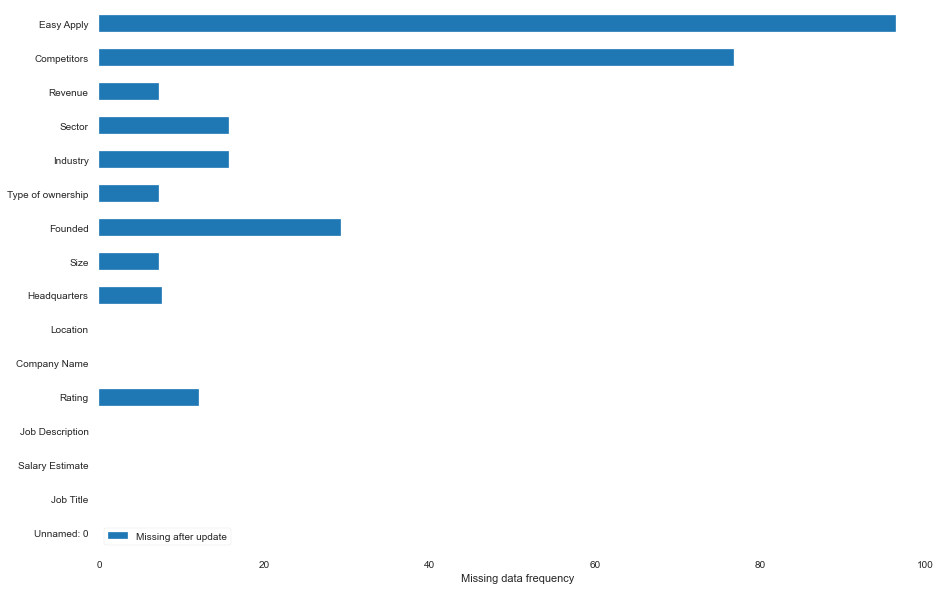

In [16]:
prop_msval.plot(kind='barh', figsize=(15,10))
plt.xlabel('Missing data frequency')

# Check missing value >10%

In [18]:
prop_msval2 = prop_msval[prop_msval['Missing after update']>10.0]
display(prop_msval2)

,Missing after update
Rating,12.072792
Founded,29.294274
Industry,15.667998
Sector,15.667998
Competitors,76.875277
Easy Apply,96.449179


# drop missing value >20%

In [19]:
to_drop = prop_msval[prop_msval['Missing after update']>20.0]
to_drop = to_drop.transpose()
display(to_drop)

,Founded,Competitors,Easy Apply
Missing after update,29.294274,76.875277,96.449179


In [20]:
df = df.drop(to_drop,axis=1)
df = df.drop('Unnamed: 0',axis=1)
df.head(5)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Type of ownership,Industry,Sector,Revenue
0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD)
1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD)
2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,Company - Private,Internet,Information Technology,Unknown / Non-Applicable
3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity\n4.1,"New York, NY","McLean, VA",201 to 500 employees,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD)
4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel\n3.9,"New York, NY","New York, NY",501 to 1000 employees,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD)


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2253 entries, 0 to 2252
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          2253 non-null   object 
 1   Salary Estimate    2252 non-null   object 
 2   Job Description    2253 non-null   object 
 3   Rating             1981 non-null   float64
 4   Company Name       2252 non-null   object 
 5   Location           2253 non-null   object 
 6   Headquarters       2081 non-null   object 
 7   Size               2090 non-null   object 
 8   Type of ownership  2090 non-null   object 
 9   Industry           1900 non-null   object 
 10  Sector             1900 non-null   object 
 11  Revenue            2090 non-null   object 
dtypes: float64(1), object(11)
memory usage: 211.3+ KB


# Data analysis

# Ratings

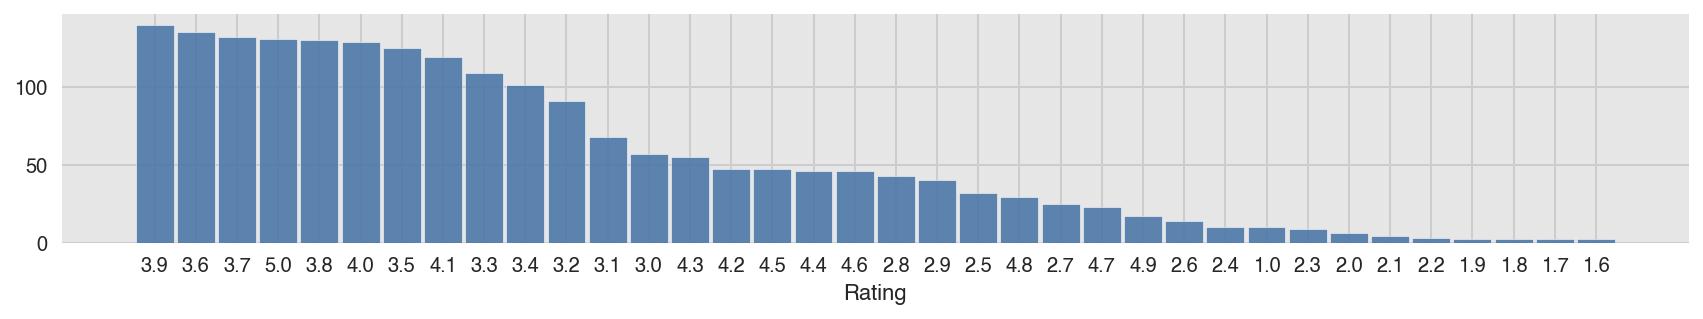

In [22]:
dxp.count('Rating',df)

**100+ companies have ratings above 3**

# Company Names

In [23]:
labels = df['Company Name'].value_counts()[:15].index
values = df['Company Name'].value_counts()[:15].values

plt.figure(figsize=(10,10))
fig = go.Figure(data=[go.Pie(labels=labels, textinfo='label+percent', values=values)])
fig.show()

<Figure size 720x720 with 0 Axes>

**Top 15 Companies that provide Data Analyst based jobs**

# Salary Estimates

In [24]:
labels = df['Salary Estimate'].value_counts()[:15].index
values = df['Salary Estimate'].value_counts()[:15].values

plt.figure(figsize=(10,10))
fig = go.Figure(data=[go.Pie(labels=labels, textinfo='label+percent', values=values)])
fig.show()

<Figure size 720x720 with 0 Axes>

**Top 15 Salary Packages offered by Companies**

# Industry

In [25]:
labels = df['Industry'].value_counts()[:15].index
values = df['Industry'].value_counts()[:15].values

plt.figure(figsize=(10,10))
fig = go.Figure(data=[go.Pie(labels=labels, textinfo='label+percent', values=values)])
fig.show()

<Figure size 720x720 with 0 Axes>

***Most of the job opportunities are from IT, Staffing & Outsourcing and -1***

# Location

In [26]:
labels = df['Location'].value_counts()[:15].index
values = df['Location'].value_counts()[:15].values

plt.figure(figsize=(10,10))
fig = go.Figure(data=[go.Pie(labels=labels, textinfo='label+percent', values=values)])
fig.show()

<Figure size 720x720 with 0 Axes>

***Most of the companies listed here are New york based with 24.8%, followed by Chicago and San Francisco***

# Sector

In [27]:
labels = df['Sector'].value_counts()[:15].index
values = df['Sector'].value_counts()[:15].values

plt.figure(figsize=(10,10))
fig = go.Figure(data=[go.Pie(labels=labels, textinfo='label+percent', values=values)])
fig.show()

<Figure size 720x720 with 0 Axes>

# Job Title

In [28]:
labels = df['Job Title'].value_counts()[:15].index
values = df['Job Title'].value_counts()[:15].values

plt.figure(figsize=(10,10))
fig = go.Figure(data=[go.Pie(labels=labels, textinfo='label+percent', values=values)])
fig.show()

<Figure size 720x720 with 0 Axes>

**Data Analyst, Senior Data Scientist based jobs are mostly offered as can be seen above**

# Revenue

In [29]:
labels = df['Revenue'].value_counts()[:20].index
values = df['Revenue'].value_counts()[:20].values

plt.figure(figsize=(10,10))
fig = go.Figure(data=[go.Pie(labels=labels, textinfo='label+percent', values=values)])
fig.show()

<Figure size 720x720 with 0 Axes>

# Salary Estimates Sector Wise

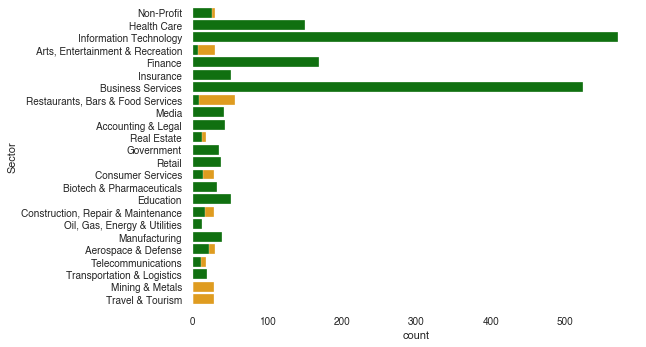

In [30]:
sns.countplot(y=df['Salary Estimate'], color='orange')
sns.countplot(y=df['Sector'], color='green')

# Ownership

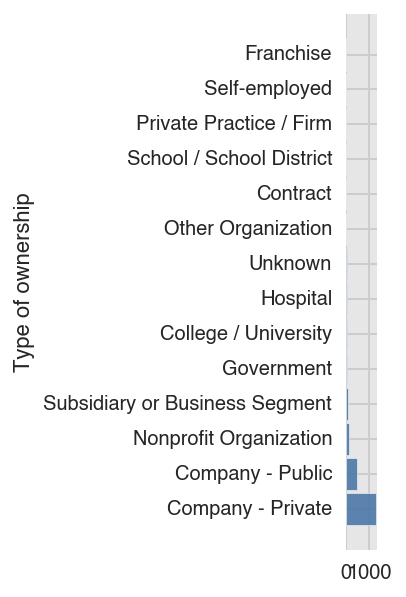

In [31]:
dxp.count('Type of ownership', df, orientation='h')

**Most of the companies are Private**